# Introduction

The project is a comprehensive exploration of unstructured data pertaining to Toyota, a globally recognized leader in the automotive industry. The goal is to delve into the vast ocean of public sentiment and discourse surrounding Toyota's products, services, and brand perception, leveraging the rich and dynamic platform of Reddit. Reddit, with its myriad of user-generated content, serves as a fertile ground for capturing a wide range of consumer opinions, experiences, and discussions.

To accomplish this, we will utilize Reddit's API, which allows for the efficient extraction of a substantial volume of posts and comments related to Toyota. By setting up the necessary software infrastructure, including authentication protocols and the installation of pertinent Python packages, we will utilize the power of advanced Natural Language Processing (NLP) tools to sift through and analyze this data. We aim to distill and understand the core narratives and sentiments expressed by users regarding Toyota, covering topics from product quality and customer service to brand loyalty and competitive positioning. This will involve the application of state-of-the-art NLP techniques, such as transformers and vector space models like Word2Vec or Doc2Vec, to decode the nuanced meanings embedded within the unstructured text. Through this endeavor, we aim to provide a holistic view of Toyota's standing in the public eye, informed by a rigorous examination of unstructured data from one of the internet's most vibrant communities.

In [45]:
pip install praw

Note: you may need to restart the kernel to use updated packages.


The praw library is used to authenticate and interact with the Reddit API, targeting the 'Toyota' subreddit to collect comments from posts with more than 100 upvotes, up to a limit of 1000 posts. It fetches top-level comments from qualifying posts, compiling relevant information such as comment ID, body, author, upvotes, downvotes, creation time, and associated post details into a list. This list is then saved to a JSON file named 'toyota_reddit_comments_filtered.json'. The process aims to facilitate data analysis by providing a structured dataset of community engagement with popular Toyota-related content on Reddit.

In [46]:
import praw
import json

# Authentication with Reddit API
reddit = praw.Reddit(
    client_id='YvBC634xbXk9exYXFbdqkQ',
    client_secret='OO_7rVSMGCoD1pK6V6hPraRrO6-gTA',
    user_agent='Limp_Insurance_8220'
)

subreddit_name = 'Toyota'  
post_limit = 1000  # Number of posts to fetch
upvote_threshold = 100  # Only fetch comments from posts with more than 100 upvotes

comments_list = []  # To store the comments

# Fetching posts from the subreddit
for submission in reddit.subreddit(subreddit_name).hot(limit=post_limit):
    if submission.ups > upvote_threshold:  # Check if the post meets the upvote criteria
        submission.comments.replace_more(limit=0)  # Fetch top-level comments
        for comment in submission.comments.list():
            comments_list.append({
                'comment_id': comment.id,
                'comment_body': comment.body,
                'comment_author': str(comment.author),
                'comment_upvotes': comment.ups,
                'comment_downvotes': comment.downs,
                'comment_created_utc': comment.created_utc,
                'post_id': submission.id,
                'post_title': submission.title,
                'post_upvotes': submission.ups
            })

# Saving the comments list to a JSON file
with open('toyota_reddit_comments_filtered.json', 'w', encoding='utf-8') as f:
    json.dump(comments_list, f, ensure_ascii=False, indent=4)

print(f"Saved {len(comments_list)} comments to toyota_reddit_comments_filtered.json")

Saved 4227 comments to toyota_reddit_comments_filtered.json


In [47]:
pip install gensim matplotlib seaborn nltk


Note: you may need to restart the kernel to use updated packages.


Comments from the JSON file named 'toyota_reddit_comments_filtered.json' is converted into a pandas DataFrame for manipulation. It leverages the Natural Language Toolkit (NLTK) to preprocess the text of each comment. This preprocessing includes downloading necessary NLTK data (punkt for tokenizing and stopwords to filter out common English stop words), tokenizing the comments into words, converting them to lowercase, and then removing both the stop words and any tokens that are not alphabetic. The result of this preprocessing is a list of filtered tokens for each comment, which is then added to the DataFrame as a new column named 'processed_text'. This prepares the text data for further natural language processing (NLP) tasks by cleaning and standardizing the comment texts.

In [48]:
import json
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the JSON file
with open('toyota_reddit_comments_filtered.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convert the loaded data to a DataFrame
df = pd.DataFrame(data)

# Preprocess the text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lower case
    filtered_tokens = [w for w in tokens if not w in stop_words and w.isalpha()]  # Remove stopwords and non-alphabetic words
    return filtered_tokens

df['processed_text'] = df['comment_body'].apply(preprocess_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [49]:
from gensim.models import Word2Vec

# Prepare data for Word2Vec
sentences = df['processed_text'].tolist()

# Train the Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
model.save("word2vec_reddit_comments.model")


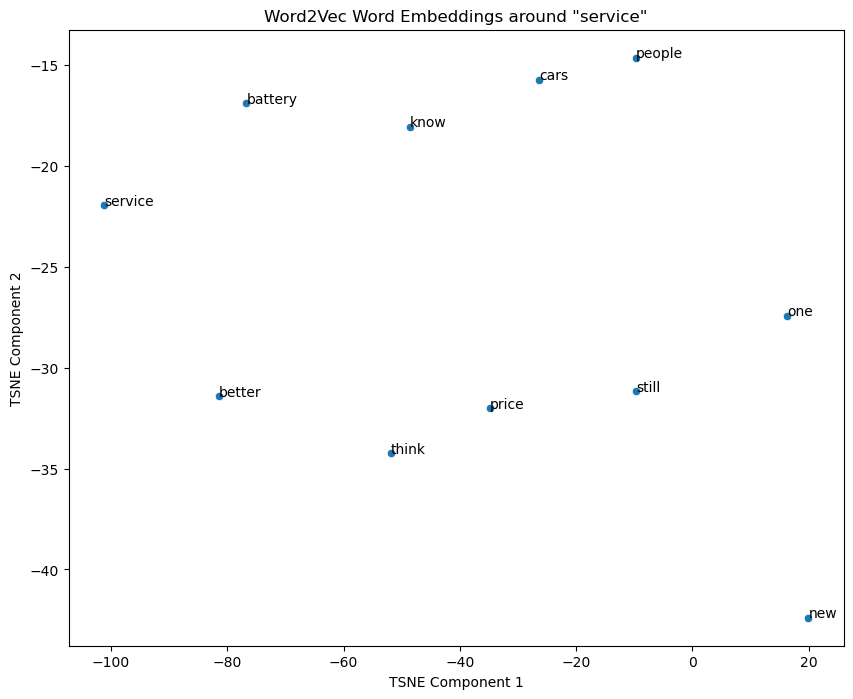

In [50]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tsne = TSNE(n_components=2, random_state=0, perplexity=5) 

word_vectors_2d = tsne.fit_transform(word_vectors)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

# Specify x and y parameters explicitly
sns.scatterplot(x=word_vectors_2d[:, 0], y=word_vectors_2d[:, 1])

# Annotate points with the corresponding words
for i, word in enumerate(words):
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

plt.title('Word2Vec Word Embeddings around "service"')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


The image is a 2D scatter plot visualizing the word embeddings of various terms from the Reddit comments related to Toyota, which have been reduced to two dimensions using t-SNE. Each point on the plot represents a word, and its position is determined by its relationship to other words in the high-dimensional space of the Word2Vec model. Words that are closer together in this 2D space are more likely to have similar contexts in the dataset, indicating they are used in similar ways or in related discussions.

The plot is titled "Word2Vec Word Embeddings around 'service'", suggesting a focus on words related to "service". We can see that the word "service" is somewhat centrally located, indicating it might be a common word in the comments. Words like "battery", "better", and "think" are relatively close to "service", which could mean that these words commonly appear in discussions about Toyota's service, perhaps in relation to battery service or considerations about what better service might involve.

Other words such as "cars", "people", "one", "still", "price", and "new" are spread out, suggesting varied contexts. "Cars" and "people" are closer to each other than to "service", perhaps indicating discussions about people's opinions on Toyota cars in general. The words "one", "still", "price", and "new" could be associated with discussions about the pricing of new Toyota models or the value of current ones.

The distance between these words and "service" suggests they may not be as closely related to service-related discussions but are still relevant to the broader conversation about Toyota in the subreddit.

Overall, the visualization helps us understand the semantic relationships between words in the dataset and can provide insights into the main themes and discussions occurring within the Toyota subreddit.

In [51]:
import json
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Load the JSON file
with open('toyota_reddit_comments_filtered.json', 'r', encoding='utf-8') as file:
    comments_data = json.load(file)

# Extract just the comment bodies into a list
corpus = [comment['comment_body'] for comment in comments_data]

# Now, define a function to search for contexts of a given word in the corpus
def find_contexts(word, corpus, num_contexts=5):
    # Tokenize the corpus into sentences
    sentences = [sent_tokenize(comment) for comment in corpus]
    sentences = [sent for sublist in sentences for sent in sublist]  # Flatten the list of lists

    # Find and print sentences that contain the word
    contexts = [sentence for sentence in sentences if word in sentence.lower()]
    
    # Print the found contexts
    for context in contexts[:num_contexts]:  # Only print the first few contexts
        print(context)
    print(f"Found {len(contexts)} sentences containing the word '{word}'.")

# Example usage:
# Let's find contexts for the word 'service'
find_contexts('service', corpus)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Had terrible service lately from Toyota dealerships.
Wish Toyota would do away with commissioned service advisors and technicians.
LoJack fee- $1500ish
Special insurance theft fee -$300ish
Nitrogen in tires fee-$300 ish
Special ceramic coat fee-$799ish
Window etching-$200ish
Mandatory service contract fee-$4995
Fee fi fo fee because we can document fee -$799

So yeah, heads up is possible for sure

Realizing you are losing quality lifelong customers to other companies because you are scumbags?=priceless
 I'm $16k and 3yrs into my 06' IS350 with $8k of that being upfront cost, and the rest being the "200k mile service" as I like to call it.
Toyota service centers are reasonably price if you shop around.
Found 194 sentences containing the word 'service'.


The results presented are examples of sentences extracted from the Reddit comments dataset that include the word 'service'. The function find_contexts found 194 sentences containing the word 'service'. Here's a brief explanation of the provided contexts:

The first sentence expresses dissatisfaction with the service received at Toyota dealerships. The term "terrible service" suggests a negative customer experience. The second sentence reflects a desire for Toyota to change its service model, specifically mentioning commissioned service advisors and technicians, implying that the current commission-based system may lead to dissatisfaction. Sentences three through eight list various fees that the author appears to have been charged. These fees are described with a touch of sarcasm, suggested by the "Fee fi fo fee" comment, indicating the author feels there are too many unnecessary or excessively high charges. The phrase "So yeah, heads up is possible for sure" could be interpreted as a warning to other potential customers to be aware of these fees.

The sentence starting with "Realizing you are losing quality lifelong customers..." accuses Toyota of losing valuable customers due to perceived unethical practices, again indicating a negative sentiment towards Toyota's service. The next sentence details personal costs associated with maintaining an '06 IS350, distinguishing between the initial purchase and subsequent service costs, labeling them humorously as the "200k mile service". The last sentence offers a contrasting view, suggesting that Toyota service centers can be "reasonably priced" if one takes the time to shop around, which implies that there are positive experiences as well, depending on the effort to find better pricing.

Overall, the results showcase a range of sentiments from Reddit users regarding Toyota's service, with a mixture of criticisms about pricing and service quality, as well as an acknowledgment that satisfactory service options exist.

In [52]:
pip install praw textblob

Note: you may need to restart the kernel to use updated packages.


In [53]:
import csv
from textblob import TextBlob

with open('toyota_reddit_comments_filtered.json', 'r', encoding='utf-8') as file:
    comments_data = json.load(file)

# Perform sentiment analysis and write to CSV
with open('sentiment_analysis_results.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Comment', 'Polarity', 'Subjectivity']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for comment in comments_data:
        analysis = TextBlob(comment['comment_body'])
        writer.writerow({
            'Comment': comment['comment_body'],
            'Polarity': analysis.sentiment.polarity,
            'Subjectivity': analysis.sentiment.subjectivity
        })

print("Sentiment analysis complete and results saved to sentiment_analysis_results.csv")


Sentiment analysis complete and results saved to sentiment_analysis_results.csv


In [54]:
pip install matplotlib seaborn pandas


Note: you may need to restart the kernel to use updated packages.


C:\Users\nikhi\AppData\Local\Temp\ipykernel_15028\683232724.py:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Subjectivity'], shade=True)


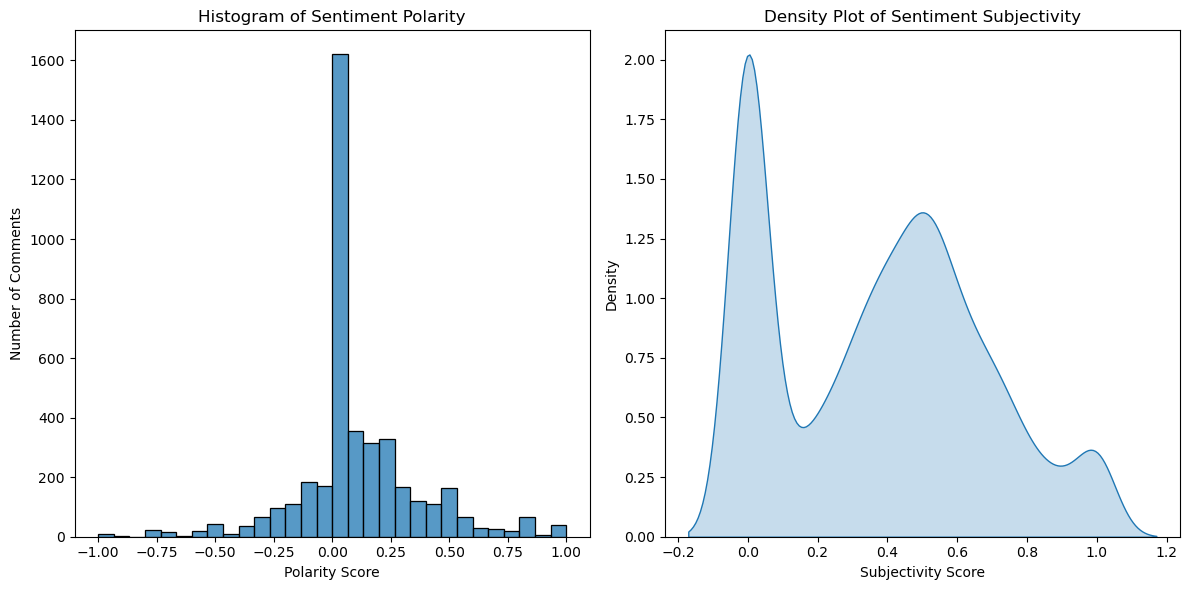

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analysis results
df = pd.read_csv('sentiment_analysis_results.csv')

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Draw a histogram for sentiment polarity scores
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(df['Polarity'], bins=30, kde=False)
plt.title('Histogram of Sentiment Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Number of Comments')

# Draw a density plot for sentiment subjectivity scores
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.kdeplot(df['Subjectivity'], shade=True)
plt.title('Density Plot of Sentiment Subjectivity')
plt.xlabel('Subjectivity Score')
plt.ylabel('Density')

# Show the plots
plt.tight_layout() 
plt.show()


The visualizations depict the sentiment analysis results from a collection of comments, analyzed for polarity and subjectivity.

**Histogram of Sentiment Polarity:**

The polarity scores range from -1 to 1, where -1 represents a highly negative sentiment, 0 represents neutrality, and 1 represents a highly positive sentiment.
The histogram shows a pronounced peak around 0, indicating that the majority of comments have a neutral sentiment.
The distribution is relatively symmetrical, suggesting a balance between positive and negative comments. However, there are slightly more comments on the negative side (left of the peak), pointing to a tendency towards negative sentiment in the dataset.

**Density Plot of Sentiment Subjectivity:**

Subjectivity scores range from 0 to 1, where 0 is entirely objective and 1 is highly subjective.
The density plot reveals a bimodal distribution with two peaks, one near 0.2 and another near 0.8.
The presence of two peaks indicates that comments tend to be either mostly objective or mostly subjective, with fewer comments falling in the middle range.
The higher peak near 0.8 suggests that a significant portion of the comments contains subjective content, which may include personal opinions, emotions, and speculations.

In summary, the comments analyzed are slightly skewed towards negativity, though a large portion is neutral. There is a significant presence of subjectivity in the discourse, suggesting that personal opinions and experiences heavily influence the discussion.

In [56]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

# Load your corpus from a JSON file
with open('toyota_reddit_comments_filtered.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    corpus = [item['comment_body'] for item in data]

def get_top_n_phrases(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 3), stop_words='english').fit(corpus)
    bag_of_phrases = vec.transform(corpus)
    sum_phrases = bag_of_phrases.sum(axis=0)
    phrases_freq = [(phrase, sum_phrases[0, idx]) for phrase, idx in vec.vocabulary_.items()]
    phrases_freq = sorted(phrases_freq, key=lambda x: x[1], reverse=True)
    return phrases_freq[:n]

# Extract key phrases from the corpus
top_phrases = get_top_n_phrases(corpus, n=10)
print(top_phrases)


[('land cruiser', 74), ('oil change', 64), ('new car', 58), ('looks like', 50), ('https www', 49), ('years ago', 47), ('brand new', 46), ('000 miles', 43), ('don know', 35), ('oil changes', 34)]


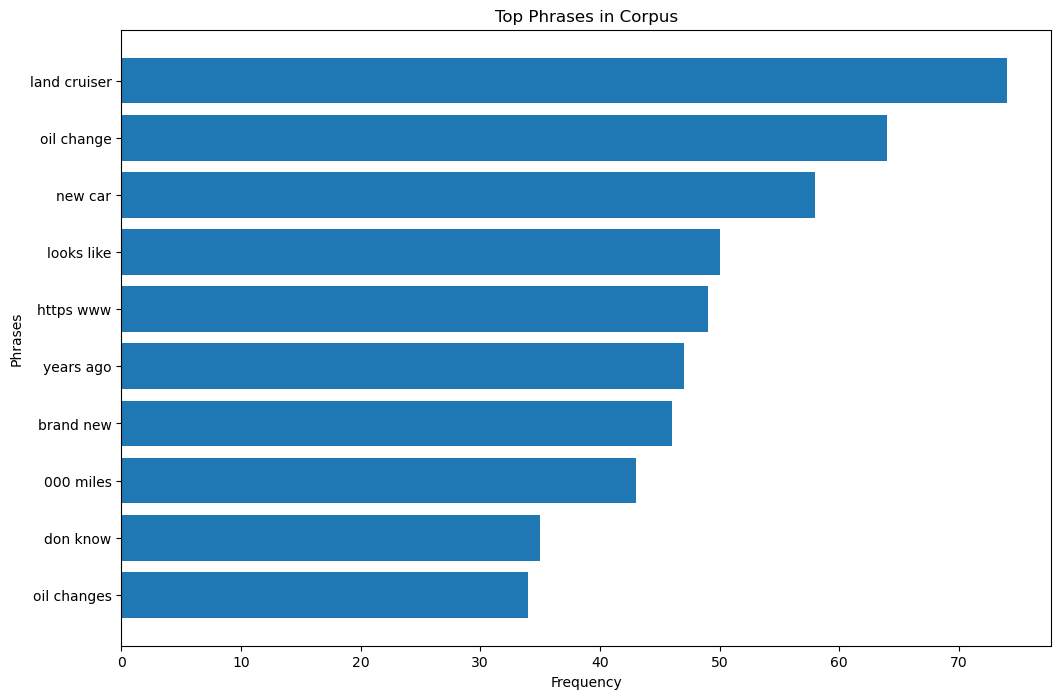

In [57]:
# Separate the phrases and their corresponding frequencies for plotting
phrases = [phrase for phrase, count in top_phrases]
counts = [count for phrase, count in top_phrases]

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(phrases[::-1], counts[::-1]) 
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.title('Top Phrases in Corpus')
plt.show()

The bar chart and the ouput list provide the top phrases from the corpus of Toyota-related Reddit comments and their frequency of occurrence.

"land cruiser" is the most frequently mentioned phrase, occurring 74 times, which could indicate discussions specific to the Toyota Land Cruiser model. "oil change" and "oil changes" appear with high frequency (64 and 34 times respectively), suggesting that maintenance, specifically oil-related services, is a common topic. "new car" and "brand new" (58 and 46 occurrences) could reflect conversations about purchasing new Toyota vehicles or the latest models. "looks like" with 50 mentions could be part of comments on the appearance of cars or comparisons to other vehicles or models. "https www" occurring 49 times indicates that links are often shared in comments, possibly directing to images, further information, or related content.

"years ago" with 47 occurrences points to reminiscing or comparing past models or experiences with current ones. "000 miles" is mentioned 43 times, which is likely in the context of vehicle longevity, mileage milestones, or maintenance schedules. "don know" (35 times) suggests uncertainty or lack of information in the discussions, potentially about car features, services, or other inquiries.

Overall, the results reflect a community engaged in discussing vehicle maintenance, model-specific features, purchasing new vehicles, and sharing resources or information. The prominence of certain phrases indicates what is important or of interest to the subreddit members talking about Toyota.

In [58]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer

# Helper function to print topics with their terms
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(", ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(corpus)
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)


Topics found via LDA:

Topic #0:
toyota, just, data, dealership, know, did, cruiser, app, land, like

Topic #1:
car, toyota, just, dealership, buy, deal, like, vehicle, got, tire

Topic #2:
new, car, toyota, like, oil, battery, don, just, got, cars

Topic #3:
just, car, like, toyota, dealer, lol, dealership, yes, got, make

Topic #4:
like, car, oil, don, miles, just, engine, know, people, good


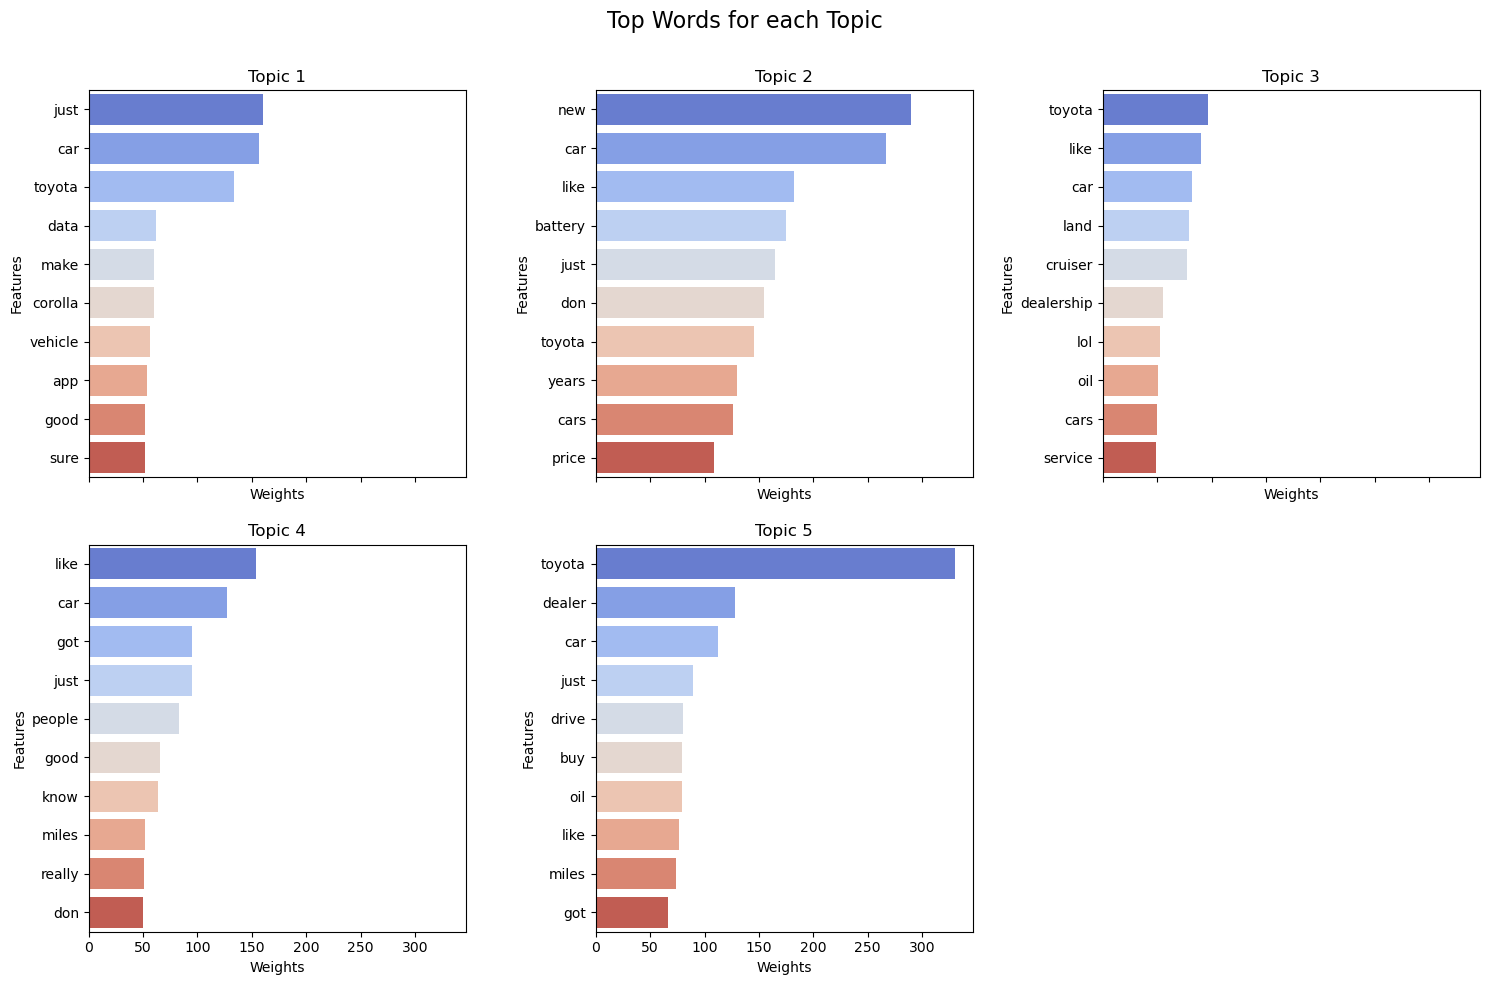

In [59]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json


with open('toyota_reddit_comments_filtered.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    corpus = [item['comment_body'] for item in data]

# Create and fit the LDA model
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(corpus)
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

# Helper function to plot the top words for each topic
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True)  # Adjust the subplot grid as needed
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx < number_topics:  # Check if the current index is less than the number of topics
            top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
            top_features = [feature_names[i] for i in top_features_ind]
            weights = topic[top_features_ind]

            sns.barplot(x=weights, y=top_features, ax=axes[topic_idx], palette='coolwarm')
            axes[topic_idx].set_title(f'Topic {topic_idx + 1}')
            axes[topic_idx].set_xlabel('Weights')
            axes[topic_idx].set_ylabel('Features')

    # Hide the last subplot (if the number of topics is less than the number of subplots)
    for i in range(number_topics, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout(w_pad=2.0, h_pad=2.0)  # Adjust padding between and around subplots
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

number_topics = 5
number_words = 10

# Get the feature names (words) from the count vectorizer
tf_feature_names = count_vectorizer.get_feature_names_out()

# Plot the top words for each topic
plot_top_words(lda, tf_feature_names, number_words, 'Top Words for each Topic')


Topic 0:
The dominant words like "toyota," "data," "dealership," "app," "land," and "cruiser" suggest that this topic is related to Toyota dealership experiences and perhaps discussions about the Land Cruiser model, as well as the technology or apps associated with Toyota vehicles.

Topic 1:
Words such as "car," "buy," "deal," "vehicle," "tire" indicate this topic revolves around the purchasing experience, deals at dealerships, and specifics about the cars, including parts like tires.

Topic 2:
This topic, with words like "new," "oil," "battery," and "cars," is likely related to maintenance and parts, as well as discussions about new Toyota cars. The mention of "oil" and "battery" suggests a focus on service and parts.

Topic 3:
The presence of words like "dealer," "dealership," "lol," and "yes" alongside general words like "just," "car," and "like," could indicate a mix of topics including dealership interactions with a possible slant towards informal or humorous exchanges (indicated by "lol").

Topic 4:
Words such as "oil," "miles," "engine," and "good" imply discussions focused on vehicle maintenance and performance, possibly covering topics like oil changes, mileage, and engine health or issues.

The bar charts in the image visualize the weight of each word within its respective topic, showing how significant a word is in defining the topic. Words closer to the top of each bar chart have a greater weight and are more influential in their respective topics. These visualizations and the accompanying top words for each topic offer a glimpse into the main themes present in the dataset, which can help in understanding the main concerns and interests of the individuals in the conversations being analyzed.

In [60]:
pip install wordcloud


  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 880.9 kB/s eta 0:00:01
   ------------------------------- -------- 235.5/300.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


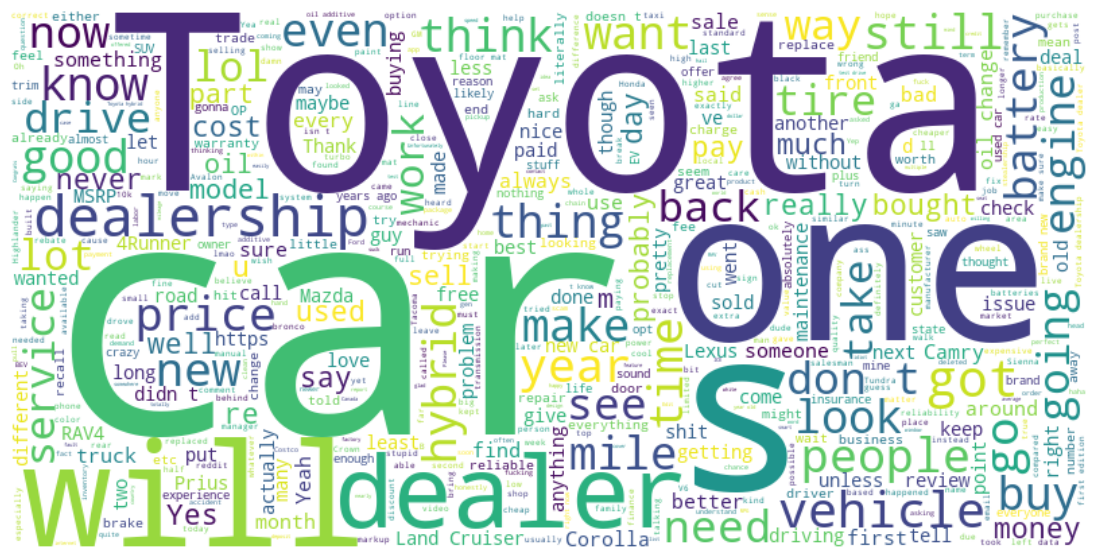

In [61]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your corpus from a JSON file
with open('toyota_reddit_comments_filtered.json', 'r', encoding='utf-8') as file:
    data = json.load(file)
    corpus = [item['comment_body'] for item in data]

# Join all the comments into a single string
text = " ".join(comment for comment in corpus)

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=None, background_color="white", max_words=500, width=800, height=400).generate(text)

# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The word cloud is a visual representation of the frequency of word usage within the Toyota-related Reddit comments corpus. In the word cloud, the size of each word is proportional to its frequency of occurrence in the text. Larger words were used more frequently, and smaller words less so. Notable large words such as "Toyota," "dealer," "car," "year," "new," "price," "service," "mile," "used," and "model" suggest these are key topics of conversation.

The prevalence of words like "Toyota" and "dealer" indicates that many comments are focused on the brand and its dealerships. The word "service" suggests discussions around maintenance and customer service, while "new" and "used" imply conversations about purchasing cars. "Price" and "mile" are likely related to discussions on vehicle cost, value, and longevity. Model names like "Camry," "Corolla," and "Land Cruiser" are also prominent, indicating these models are frequently mentioned in discussions.

Words like "year," "make," "back," "tire," and "drive" are somewhat smaller but still noticeable, which could relate to manufacturing years, making of the cars, financing or trade-in discussions, and driving experiences or performance. The word "love" in the mix suggests positive sentiments from users as well.

Overall, the word cloud provides a quick and visually impactful way to discern the most prominent themes and sentiments expressed in the comments without the nuance of specific sentiments or context. The words together provide a snapshot of the collective concerns, interests, and discussions among the Reddit community members in the context of Toyota.

# Conclusion

The various analyses performed on the Toyota-related Reddit comments dataset provide a multifaceted view of the conversations and sentiments within the community.

Firstly, the sentiment analysis indicates a balance of positive, neutral, and negative comments, with a slight skew towards negative sentiments. This suggests that while there is a mixture of opinions, there may be some concerns or criticisms expressed by the community.

The extraction of phrases and the topic modeling with LDA revealed that maintenance topics, especially regarding oil changes, are frequently discussed. This points to a community actively engaged in the care and servicing of their vehicles. The focus on particular models such as the Land Cruiser, as well as discussions on new and used cars, indicates an active exchange of advice and experiences regarding the purchase and ownership of Toyota vehicles.

The word cloud visualization reinforced these findings, highlighting 'Toyota,' 'dealer,' 'service,' 'price,' and model names as significant points of discussion. The prominence of terms like 'new,' 'used,' 'year,' and 'mile' shows an interest in the lifecycle of vehicle ownership, from purchase to maintenance.

In conclusion, the Toyota subreddit is a space where individuals are actively sharing their experiences and seeking advice on various aspects of vehicle ownership and maintenance. The sentiment towards the brand and its dealerships appears mixed, with a notable amount of discussion centered on costs and customer service experiences. Model-specific conversations suggest a strong product interest, with practical considerations such as longevity, maintenance, and pricing being top of mind for contributors. Overall, the analysis provides a comprehensive snapshot of the community's focus, concerns, and sentiment towards Toyota and its vehicles.